In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Requirements to Run the Notebook

In [24]:
!pip install transformers
!pip install nltk
!pip install gdown

In [2]:
# the OG 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style


# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.utils.class_weight import compute_class_weight

#NLP Specifics
from nltk import word_tokenize
import nltk
from tokenizers import BertWordPieceTokenizer
from transformers import (AdamW,get_linear_schedule_with_warmup,get_cosine_schedule_with_warmup,RobertaTokenizerFast,DistilBertTokenizerFast,PreTrainedTokenizerFast,AutoModel,
                          DistilBertTokenizerFast,GPT2TokenizerFast,AutoTokenizer,BertTokenizer,TFBertModel,TFOpenAIGPTModel,OpenAIGPTTokenizer,DistilBertTokenizer, TFDistilBertModel,XLMTokenizer, TFXLMModel,TFBertForSequenceClassification,TFGPT2Model,TFXLMRobertaModel)

#tensorflow
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.initializers import Constant

#other imports
import urllib
import os
import gc
from tqdm import tqdm
import re
import random
from typing import Callable, List, Optional, Union
from google_drive_downloader import GoogleDriveDownloader as gdd

nltk.download('punkt')
style.use('ggplot')
MAX_LEN=256

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mohammad.Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
def download_data():
    previous_dir=os.getcwd()
    if not os.path.isdir(os.getcwd()+"\\FNC_ARC_data"):
        os.mkdir("FNC_ARC_data")
    os.chdir(os.getcwd()+"\\FNC_ARC_data")
    !gdown --id 1DJ5qzz2d95RWOOnvq_cliuTZmzA6dkq9 --output data.csv
    !gdown --id 1e0YowZtavsiLnRV2CrzK-s_oc-P7vrYO --output training_ids.txt
    !gdown --id 1--tKEAnPz6auqttxTRBnh4Cn83FoM3IN --output hold_out_ids.txt
    !gdown --id 1Yi-kv_VPoHXzYWDYEsrzmgsLabYRobV8 --output combined_bodies_test.csv
    !gdown --id 1R6ii3erNvkUfr_GAX8lM-BQ00BLsh7cM --output combined_stances_test.csv
    os.chdir(previous_dir)
    
download_data()

Downloading...
From: https://drive.google.com/uc?id=1DJ5qzz2d95RWOOnvq_cliuTZmzA6dkq9
To: C:\Users\Mohammad.Khan\Anaconda3\libs\GBX_Model\main\FNC_ARC_data\data.csv

0.00B [00:00, ?B/s]
524kB [00:00, 802kB/s]
1.05MB [00:00, 1.39MB/s]
1.57MB [00:01, 1.86MB/s]
2.10MB [00:01, 2.16MB/s]
2.62MB [00:01, 1.81MB/s]
3.15MB [00:01, 2.09MB/s]
3.67MB [00:02, 1.58MB/s]
4.19MB [00:02, 1.58MB/s]
4.72MB [00:02, 1.93MB/s]
5.24MB [00:02, 2.21MB/s]
5.77MB [00:03, 1.90MB/s]
6.29MB [00:03, 2.01MB/s]
6.82MB [00:03, 2.31MB/s]
7.34MB [00:03, 2.27MB/s]
7.86MB [00:03, 2.64MB/s]
8.39MB [00:04, 2.61MB/s]
8.91MB [00:04, 2.78MB/s]
9.44MB [00:04, 3.02MB/s]
9.96MB [00:04, 3.13MB/s]
10.5MB [00:04, 3.28MB/s]
11.0MB [00:04, 3.31MB/s]
11.5MB [00:05, 3.25MB/s]
12.1MB [00:06, 801kB/s] 
12.6MB [00:07, 1.02MB/s]
13.1MB [00:07, 1.18MB/s]
13.6MB [00:07, 1.07MB/s]
14.2MB [00:08, 1.16MB/s]
14.7MB [00:08, 1.23MB/s]
15.2MB [00:08, 1.52MB/s]
15.7MB [00:09, 1.78MB/s]
16.3MB [00:09, 2.04MB/s]
16.8MB [00:09, 2.11MB/s]
17.3MB [00:10, 1

Downloading...
From: https://drive.google.com/uc?id=1e0YowZtavsiLnRV2CrzK-s_oc-P7vrYO
To: C:\Users\Mohammad.Khan\Anaconda3\libs\GBX_Model\main\FNC_ARC_data\training_ids.txt

  0%|          | 0.00/27.5k [00:00<?, ?B/s]
100%|##########| 27.5k/27.5k [00:00<00:00, 284kB/s]
Downloading...
From: https://drive.google.com/uc?id=1--tKEAnPz6auqttxTRBnh4Cn83FoM3IN
To: C:\Users\Mohammad.Khan\Anaconda3\libs\GBX_Model\main\FNC_ARC_data\hold_out_ids.txt

  0%|          | 0.00/6.88k [00:00<?, ?B/s]
100%|##########| 6.88k/6.88k [00:00<00:00, 6.94MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Yi-kv_VPoHXzYWDYEsrzmgsLabYRobV8
To: C:\Users\Mohammad.Khan\Anaconda3\libs\GBX_Model\main\FNC_ARC_data\combined_bodies_test.csv

0.00B [00:00, ?B/s]
524kB [00:00, 807kB/s]
1.05MB [00:00, 1.33MB/s]
1.57MB [00:03, 353kB/s] 
2.10MB [00:07, 231kB/s]
2.62MB [00:07, 339kB/s]
3.15MB [00:08, 405kB/s]
3.67MB [00:10, 335kB/s]
4.19MB [00:12, 301kB/s]
4.66MB [00:12, 404kB/s]
4.66MB [00:12, 370kB/s]
Downloading...
F

In [4]:
data=pd.read_csv(os.getcwd()+"\\FNC_ARC_data\\data.csv")

In [5]:
import random
import os
from collections import defaultdict
##code taken from official github to mimic the exact split(https://github.com/FakeNewsChallenge/fnc-1-baseline/blob/master/utils/generate_test_splits.py)
def generate_hold_out_split (data, training = 0.8):
    r = random.Random()
    r.seed(1489215)

    article_ids = train_article['Body ID'].tolist()
    r.shuffle(article_ids)  # and shuffle that list


    training_ids = article_ids[:int(data * len(article_ids))]
    hold_out_ids = article_ids[int(data * len(article_ids)):]

    # write the split body ids out to files for future use
    with open("training_ids.txt", "w+") as f:
        f.write("\n".join([str(id) for id in training_ids]))

    with open("hold_out_ids.txt", "w+") as f:
        f.write("\n".join([str(id) for id in hold_out_ids]))



def read_ids(file):
    ids = []
    with open(file,"r") as f:
        for line in f:
           ids.append(int(line))
        return ids


def kfold_split(data, training = 0.8, n_folds = 10):
    if not (os.path.exists(os.getcwd()+"\\FNC_ARC_data\\training_ids.txt")
            and os.path.exists(os.getcwd()+"\\FNC_ARC_data\\hold_out_ids.txt")):
        generate_hold_out_split(data, training = 0.8)

    training_ids = read_ids(os.getcwd()+"\\FNC_ARC_data\\training_ids.txt")
    hold_out_ids = read_ids(os.getcwd()+"\\FNC_ARC_data\\hold_out_ids.txt")

    folds = []
    for k in range(n_folds):
        folds.append(training_ids[int(k*len(training_ids)/n_folds):int((k+1)*len(training_ids)/n_folds)])

    return folds,hold_out_ids,training_ids


folds,hold_out_ids,training_ids=kfold_split(data, training = 0.8, n_folds = 10)

In [6]:
train=data.loc[(data['Body ID'].isin(training_ids)),:]
validation=data.loc[(data['Body ID'].isin(hold_out_ids)),:]
train['folds']=0
for n_fold in range(len(folds)):
    train.loc[(train['Body ID'].isin(folds[n_fold])),'folds']=n_fold

<ipython-input-6-d3be3193016b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['folds']=0
C:\Users\Mohammad.Khan\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [7]:
def seed_everything(seed):
  random.seed(seed)
  tf.compat.v1.set_random_seed(seed)
  tf.random.set_seed(seed)
seed_everything(123)

In [ ]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


Running on TPU  grpc://10.25.237.26:8470
INFO:tensorflow:Initializing the TPU system: grpc://10.25.237.26:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.25.237.26:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [8]:
def download_vocab_files_for_tokenizer(tokenizer, model_type, output_path):
    vocab_files_map = tokenizer.pretrained_vocab_files_map
    vocab_files = {}
    for resource in vocab_files_map.keys():
        download_location = vocab_files_map[resource][model_type]
        f_path = os.path.join(output_path, os.path.basename(download_location))
        urllib.request.urlretrieve(download_location, f_path)
        vocab_files[resource] = f_path
    return vocab_files

In [9]:
def fast_tokenization(text,encode_plus=False):
  attention_mask=[]
  input_ids=[]
  for instance in tqdm(text,desc='Tokenization Process'):
    if encode_plus:
      token_out=fast_tokenizer.encode_plus(instance,return_attention_mask=True,padding='max_length',truncation=True,max_length=MAX_LEN)
      input_ids.append(token_out['input_ids'])
      attention_mask.append(token_out['attention_mask'])
    else:
      token_out=fast_tokenizer.encode(instance)
      input_ids.append(token_out.ids)
      attention_mask.append(token_out.attention_mask)
  return input_ids,attention_mask

# GBX Model on FNC-ARC

In [10]:
X_train={}
X_valid={}
X_test={}

## Learning Rate Schedule function

In [11]:
class WarmUp(tf.keras.optimizers.schedules.LearningRateSchedule):
    """
    Applies a warmup schedule on a given learning rate decay schedule.

    Args:
        initial_learning_rate (:obj:`float`):
            The initial learning rate for the schedule after the warmup (so this will be the learning rate at the end
            of the warmup).
        decay_schedule_fn (:obj:`Callable`):
            The schedule function to apply after the warmup for the rest of training.
        warmup_steps (:obj:`int`):
            The number of steps for the warmup part of training.
        power (:obj:`float`, `optional`, defaults to 1):
            The power to use for the polynomial warmup (defaults is a linear warmup).
        name (:obj:`str`, `optional`):
            Optional name prefix for the returned tensors during the schedule.
    """

    def __init__(
        self,
        initial_learning_rate: float,
        decay_schedule_fn: Callable,
        warmup_steps: int,
        power: float = 1.0,
        name: str = None,
    ):
        super().__init__()
        self.initial_learning_rate = initial_learning_rate
        self.warmup_steps = warmup_steps
        self.power = power
        self.decay_schedule_fn = decay_schedule_fn
        self.name = name

    def __call__(self, step):
        with tf.name_scope(self.name or "WarmUp") as name:

            global_step_float = tf.cast(step, tf.float32)
            warmup_steps_float = tf.cast(self.warmup_steps, tf.float32)
            warmup_percent_done = global_step_float / warmup_steps_float
            warmup_learning_rate = self.initial_learning_rate * tf.math.pow(warmup_percent_done, self.power)
            return tf.cond(
                global_step_float < warmup_steps_float,
                lambda: warmup_learning_rate,
                lambda: self.decay_schedule_fn(step - self.warmup_steps),
                name=name,
            )

    def get_config(self):
        return {
            "initial_learning_rate": self.initial_learning_rate,
            "decay_schedule_fn": self.decay_schedule_fn,
            "warmup_steps": self.warmup_steps,
            "power": self.power,
            "name": self.name,
        }



def create_optimizer(
    init_lr: float,
    num_train_steps: int,
    num_warmup_steps: int,
    min_lr_ratio: float = 0.0,
    adam_epsilon: float = 1e-8,
    weight_decay_rate: float = 0.0,
    include_in_weight_decay: Optional[List[str]] = None,schedule='linear',
):
    """
    Creates an optimizer with a learning rate schedule using a warmup phase followed by a linear decay.

    Args:
        init_lr (:obj:`float`):
            The desired learning rate at the end of the warmup phase.
        num_train_step (:obj:`int`):
            The total number of training steps.
        num_warmup_steps (:obj:`int`):
            The number of warmup steps.
        min_lr_ratio (:obj:`float`, `optional`, defaults to 0):
            The final learning rate at the end of the linear decay will be :obj:`init_lr * min_lr_ratio`.
        adam_epsilon (:obj:`float`, `optional`, defaults to 1e-8):
            The epsilon to use in Adam.
        weight_decay_rate (:obj:`float`, `optional`, defaults to 0):
            The weight decay to use.
        include_in_weight_decay (:obj:`List[str]`, `optional`):
            List of the parameter names (or re patterns) to apply weight decay to. If none is passed, weight decay is
            applied to all parameters except bias and layer norm parameters.
    """
    # Implements linear decay of the learning rate.
    if schedule=='linear':
      lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
          initial_learning_rate=init_lr,
          decay_steps=num_train_steps - num_warmup_steps,
          end_learning_rate=init_lr * min_lr_ratio,
      )
    else:
      cosine_schedule=tf.keras.experimental.CosineDecay(
      initial_learning_rate=init_lr, decay_steps=num_train_steps - num_warmup_steps, alpha=0.0, name=None)
      
    if num_warmup_steps:
        lr_schedule = WarmUp(
            initial_learning_rate=init_lr, decay_schedule_fn=lr_schedule, warmup_steps=num_warmup_steps,
        )
    if weight_decay_rate > 0.0:
        optimizer = AdamWeightDecay(
            learning_rate=lr_schedule,
            weight_decay_rate=weight_decay_rate,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=adam_epsilon,
            exclude_from_weight_decay=["LayerNorm", "layer_norm", "bias"],
            include_in_weight_decay=include_in_weight_decay,
        )
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule, epsilon=adam_epsilon)
    # We return the optimizer and the LR scheduler in order to better track the
    # evolution of the LR independently of the optimizer.
    return optimizer, lr_schedule

## Callbacks & Metrics Function

In [12]:
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [13]:
def accuracy(y_true,y_pred,name):
  y_true=np.argmax(y_true,axis=1)
  y_pred=np.argmax(y_pred,axis=1)
  accuracy=accuracy_score(y_true,y_pred)
  print('The accuracy of the model {} is Accuracy: {:.3%}'.format(name,accuracy))
  print(classification_report(y_true, y_pred, target_names=['disagree','agree','discuss','unrelated']))

In [14]:
def f1_score_m(y_true,y_pred,name):
  y_true=np.argmax(y_true,axis=1)
  y_pred=np.argmax(y_pred,axis=1)
  f1_m=f1_score(y_true,y_pred,average='macro')
  print('The F1-M Score of the model {} is F-1-Score: {:.3%}'.format(name,f1_m))

In [15]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_loss(history,main_title):
# Use a log scale to show the wide range of values.
    plt.figure(figsize=(12,10))
    plt.semilogy(list(range(len(history.losses))),  history.losses,
               color='blue', label='Training')
    plt.title(main_title)
    plt.xlabel('Logging Step')
    plt.ylabel('Loss')
  
    plt.legend(title="Log Loss")
    
    
def plot_cm(y_true, y_pred, title):
    ''''
    input y_true-Ground Truth Labels
          y_pred-Predicted Value of Model
          title-What Title to give to the confusion matrix
    
    Draws a Confusion Matrix for better understanding of how the model is working
    
    return None
    
    '''
    
    figsize=(10,10)
    y_true=np.argmax(y_true,axis=1)
    y_pred=np.argmax(y_pred,axis=1)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [16]:
#Original credit - @bgalbraith-Orginal Comeptition Score

LABELS = ['agree', 'disagree', 'discuss', 'unrelated']
LABELS_RELATED = ['unrelated','related']
RELATED = LABELS[0:3]

def score_submission(gold_labels, test_labels):
    score = 0.0
    for i, (g, t) in enumerate(zip(gold_labels, test_labels)):
        g_stance, t_stance = g, t
        if g_stance == t_stance:
            score += 0.25
            if g_stance != 'unrelated':
                score += 0.50
        if g_stance in RELATED and t_stance in RELATED:
            score += 0.25

        

    return score

def report_score(actual,predicted,name):
    actual=np.argmax(actual,axis=1)
    predicted=np.argmax(predicted,axis=1)
    actual=pd.Series(actual).map({1:'agree',0:'disagree',2:'discuss',3:'unrelated'})
    predicted=pd.Series(predicted).map({1:'agree',0:'disagree',2:'discuss',3:'unrelated'})
    score = score_submission(actual.values,predicted.values)
    best_score = score_submission(actual.values,actual.values)
    print('For Model {}'.format(name))
    print("Score: " +str(score) + " out of " + str(best_score) + "\t("+str(score*100/best_score) + "%)")
    return score*100/best_score

## Tensor DataSet

In [17]:
def tensorflow_make_train_valid_data(X_train,y_train,X_valid,y_valid,test=False):

      train = (
          tf.data.Dataset
          .from_tensor_slices((X_train, y_train))
          .repeat()
          .shuffle(1024)
          .batch(BATCH_SIZE)
          .prefetch(AUTO))

      valid = (
          tf.data.Dataset
          .from_tensor_slices((X_valid, y_valid))
          .batch(BATCH_SIZE)
          .cache()
          .prefetch(AUTO)
      )
      return train,valid

In [18]:
def make_test_data(X_test):
    test = (
          tf.data.Dataset
          .from_tensor_slices(X_test)
          .batch(BATCH_SIZE)
      )
    return test

In [19]:
def stop_word_removal(text):
  stop_word=['The','the','a','A','An','an']
  tokenized_sentence=word_tokenize(text)
  final_tokenized_sentence=[]
  for word in tokenized_sentence:
    if word not in stop_word:
        final_tokenized_sentence.append(word)
  final_tokenized_sentence=' '.join(final_tokenized_sentence)
  return final_tokenized_sentence

# Making Test Data

In [20]:

test_bodies=pd.read_csv(os.getcwd()+"\\FNC_ARC_data\\combined_bodies_test.csv")
test_stance=pd.read_csv(os.getcwd()+"\\FNC_ARC_data\\combined_stances_test.csv")
test_df=test_bodies.merge(test_stance,on='Body ID')
test_df['combine_raw_text']=test_df['Headline']+' '+test_df['articleBody']
test_df['combine_text_tokenize']=test_df['combine_raw_text'].map(stop_word_removal)
test_df['target']=test_df['Stance'].map({'agree':1,'disagree':0,'discuss':2,'unrelated':3}) ##dont test the labels until final version of the model is ready



fast_tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")._tokenizer
fast_tokenizer.enable_padding(length=MAX_LEN)
fast_tokenizer.enable_truncation(max_length=MAX_LEN)

input_ids_distill_bert,attention_mask_distill_bert=fast_tokenization(test_df['combine_text_tokenize'].values)

fast_tokenizer = GPT2TokenizerFast.from_pretrained("distilgpt2")._tokenizer
fast_tokenizer.enable_padding(length=MAX_LEN)
fast_tokenizer.enable_truncation(max_length=MAX_LEN)
input_ids_gpt_2,attention_mask_gpt_2=fast_tokenization(test_df['combine_text_tokenize'].values)

model_type = 'distilroberta-base'
fast_tokenizer =AutoTokenizer.from_pretrained(model_type)
input_ids_roberta,attention_mask_roberta=fast_tokenization(test_df['combine_text_tokenize'].values,encode_plus=True)



X_test={}
X_test['input_ids_distill_bert'],X_test['attention_mask_distill_bert']=input_ids_distill_bert,attention_mask_distill_bert
X_test['input_ids_gpt_2'],X_test['attention_mask_gpt_2']=input_ids_gpt_2,attention_mask_gpt_2
X_test['input_ids_roberta'],X_test['attention_mask_roberta']=input_ids_roberta,attention_mask_roberta
  


Tokenization Process: 100%|██████████| 28972/28972 [00:39<00:00, 735.45it/s] 


## Encoding the Data for BERT, GPT-2 & XLM-Roberta

### Bert Encoding

In [21]:
fast_tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")._tokenizer
fast_tokenizer.enable_padding(length=MAX_LEN)
fast_tokenizer.enable_truncation(max_length=MAX_LEN)

input_ids_distill_bert,attention_mask_distill_bert=fast_tokenization(train['combine_text_tokenize'].values)
X_train['input_ids_distill_bert'],X_train['attention_mask_distill_bert']=input_ids_distill_bert,attention_mask_distill_bert
input_ids_distill_bert,attention_mask_distill_bert=fast_tokenization(validation['combine_text_tokenize'].values)
X_valid['input_ids_distill_bert'],X_valid['attention_mask_distill_bert']=input_ids_distill_bert,attention_mask_distill_bert

Tokenization Process: 100%|██████████| 12811/12811 [00:15<00:00, 817.71it/s] 


### GPT-AI 2 Encoding

In [22]:
fast_tokenizer = GPT2TokenizerFast.from_pretrained("distilgpt2")._tokenizer
fast_tokenizer.enable_padding(length=MAX_LEN)
fast_tokenizer.enable_truncation(max_length=MAX_LEN)
input_ids_gpt_2,attention_mask_gpt_2=fast_tokenization(train['combine_text_tokenize'].values)
X_train['input_ids_gpt_2'],X_train['attention_mask_gpt_2']=input_ids_gpt_2,attention_mask_gpt_2
input_ids_gpt_2,attention_mask_gpt_2=fast_tokenization(validation['combine_text_tokenize'].values)
X_valid['input_ids_gpt_2'],X_valid['attention_mask_gpt_2']=input_ids_gpt_2,attention_mask_gpt_2

Tokenization Process: 100%|██████████| 12811/12811 [00:15<00:00, 829.57it/s] 


### XLM-Roberta Encoding

In [23]:
model_type = 'distilroberta-base'
fast_tokenizer =AutoTokenizer.from_pretrained(model_type)
input_ids_roberta,attention_mask_roberta=fast_tokenization(train['combine_text_tokenize'].values,encode_plus=True)
X_train['input_ids_roberta'],X_train['attention_mask_roberta']=input_ids_roberta,attention_mask_roberta
roberta_model_base_input_id,roberta_model_attention_mask=fast_tokenization(validation['combine_text_tokenize'].values,encode_plus=True)
X_valid['input_ids_roberta'],X_valid['attention_mask_roberta']=roberta_model_base_input_id,roberta_model_attention_mask

Tokenization Process: 100%|██████████| 12811/12811 [00:16<00:00, 770.78it/s] 


In [24]:
y_train=np.array(tf.keras.utils.to_categorical(train['target'].values))
y_valid=np.array(tf.keras.utils.to_categorical(validation['target'].values))

In [25]:
print(X_train.keys())
print(X_valid.keys())

dict_keys(['input_ids_distill_bert', 'attention_mask_distill_bert', 'input_ids_gpt_2', 'attention_mask_gpt_2', 'input_ids_roberta', 'attention_mask_roberta'])
dict_keys(['input_ids_distill_bert', 'attention_mask_distill_bert', 'input_ids_gpt_2', 'attention_mask_gpt_2', 'input_ids_roberta', 'attention_mask_roberta'])


## Main Model Training

### Model Parameters

In [ ]:
BATCH_SIZE = 32
EPOCHS=30
LEARNING_RATE=4e-5
BETA_1=0.9
BETA_2=0.999
AUTO = tf.data.experimental.AUTOTUNE
# steps_per_epoch=train.shape[0]//BATCH_SIZE
total_optimization_steps=int(steps_per_epoch*EPOCHS)
WARM_UP_STEPS=int(0.06*total_optimization_steps)
optimizer_with_schedule,lr_schedule=create_optimizer(init_lr=LEARNING_RATE,num_train_steps=total_optimization_steps,num_warmup_steps=WARM_UP_STEPS,schedule='linear')

EARLY_STOP=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=4)
MAX_LEN=MAX_LEN
LOSS=tf.keras.losses.CategoricalCrossentropy()
OPTIMIZER=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE,beta_1=BETA_1,beta_2=BETA_2)

In [ ]:
test=make_test_data(X_test)

In [ ]:
def gbx_layers():
    distill_bert = (
                TFDistilBertModel.from_pretrained('distilbert-base-uncased')
            )
    

    gpt_layer=(
        TFGPT2Model.from_pretrained('distilgpt2')
    )


    roberta_model=(
        TFXLMRobertaModel.from_pretrained('distilroberta-base')
    )




    input_ids_distill_bert = tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_ids_distill_bert")
    attention_mask_distill_bert=tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name="attention_mask_distill_bert")

    input_ids_gpt_2 = tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_ids_gpt_2")
    attention_mask_gpt_2=tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name="attention_mask_gpt_2")

    input_ids_roberta = tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_ids_roberta")
    attention_mask_roberta=tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name="attention_mask_roberta")
        
    
    hidden_state_output_dbert=distill_bert([input_ids_distill_bert,attention_mask_distill_bert])[0]
    hidden_state_output_gpt_2,_=gpt_layer({'input_ids': input_ids_gpt_2, 'attention_mask': attention_mask_gpt_2},past=None)
    hidden_state_output_roberta,_=roberta_model([input_ids_roberta,attention_mask_roberta])
    
    
    
    combine_input_1=tf.keras.layers.concatenate([hidden_state_output_dbert,hidden_state_output_gpt_2,hidden_state_output_roberta],axis=2,name='Concatenate_layer')
    
    final_input=tf.keras.layers.Conv1D(filters=768,kernel_size=3,padding='same',name='Conv_1d_layer')(combine_input_1)
    final_input_1=tf.keras.layers.GlobalAveragePooling1D(name='Average_Pooling_layer')(final_input)
   
    out = tf.keras.layers.Dense(4, activation='softmax',name='Softmax_Layer')(final_input_1)

    model = tf.keras.Model(inputs=[input_ids_distill_bert,attention_mask_distill_bert,input_ids_gpt_2,attention_mask_gpt_2,input_ids_roberta,attention_mask_roberta], outputs=out)
   
    return model

## GBX Model Run

Following Parameters were used-Run(1)


1.   BATCH_SIZE = 32
2.   EPOCHS=2
3.   LEARNING_RATE=3e-5
4.   BETA_1=0.9-BETA_2=0.999
5.   Scheduler=Linear with Intial Learning Rate of 3e-5
6.   Freezing=No Layer was Freezed
7.   MAX_LEN=256
8.   Trained on TPU(Google Colab)


In [ ]:
def compile_gbx(optim):
  model=gbx_layers()
  model.compile(optimizer=optim,loss=LOSS,metrics='accuracy')
  print(model.summary())
  return model


train,valid=tensorflow_make_train_valid_data(X_train,y_train,X_valid,y_valid)
with strategy.scope():
  model=compile_gbx(optimizer_with_schedule)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_projector', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
All model checkpoint weights were used when initializing TFGPT2Model.

A

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids_distill_bert (InputLa [(None, 256)]        0                                            
__________________________________________________________________________________________________
attention_mask_distill_bert (In [(None, 256)]        0                                            
__________________________________________________________________________________________________
attention_mask_gpt_2 (InputLaye [(None, 256)]        0                                            
__________________________________________________________________________________________________
input_ids_gpt_2 (InputLayer)    [(None, 256)]        0                                            
_______________________________________________________________________________________

In [ ]:
history = LossHistory()
model.fit(
      train,steps_per_epoch=steps_per_epoch,
      epochs=EPOCHS,callbacks=[history], validation_data=valid,
)
  

Epoch 1/2
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


   2/1606 [..............................] - ETA: 2:37 - loss: 5.2713 - accuracy: 0.0000e+00WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0188s vs `on_train_batch_end` time: 0.1737s). Check your callbacks.


1606/1606 [==============================] - ETA: 0s - loss: 0.4420 - accuracy: 0.8589WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0053s vs `on_test_batch_end` time: 0.0498s). Check your callbacks.


1606/1606 [==============================] - 353s 220ms/step - loss: 0.4420 - accuracy: 0.8589 - val_loss: 0.3128 - val_accuracy: 0.8898
Epoch 2/2
1606/1606 [==============================] - 330s 205ms/step - loss: 0.1625 - accuracy: 0.9376 - val_loss: 0.2570 - val_accuracy: 0.9139


In [ ]:
y_pred=model.predict(test,verbose=1)
y_true=np.array(tf.keras.utils.to_categorical(test_df['target'].values))

  2/906 [..............................] - ETA: 1:17:56WARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0045s vs `on_predict_batch_end` time: 0.0452s). Check your callbacks.


906/906 [==============================] - 62s 68ms/step


In [ ]:
saved_history=np.array({'train_loss':history.losses})
np.save('y_pred_gbx_fnc_arc_run(1).npy',y_pred,allow_pickle=True)
np.save('saved_history_gbx_fnc_arc_run(1).npy',saved_history)

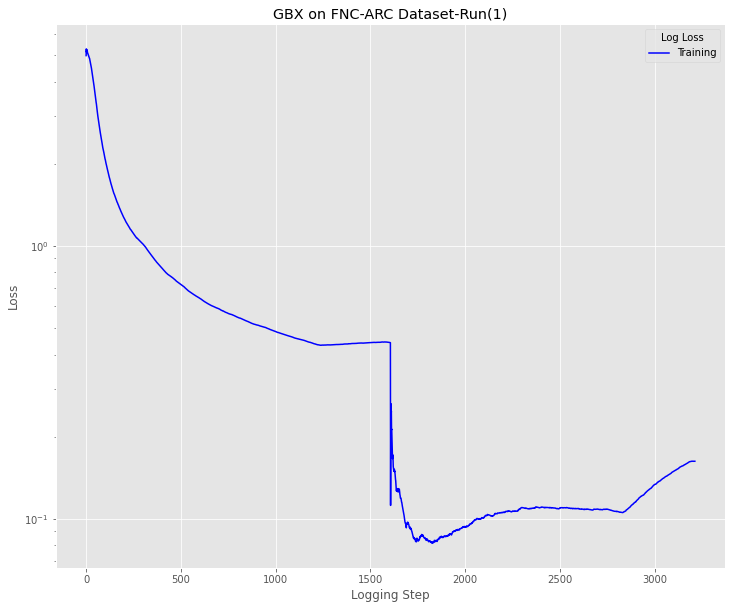

In [ ]:
plot_loss(history,'GBX on FNC-ARC Dataset-Run(1)')

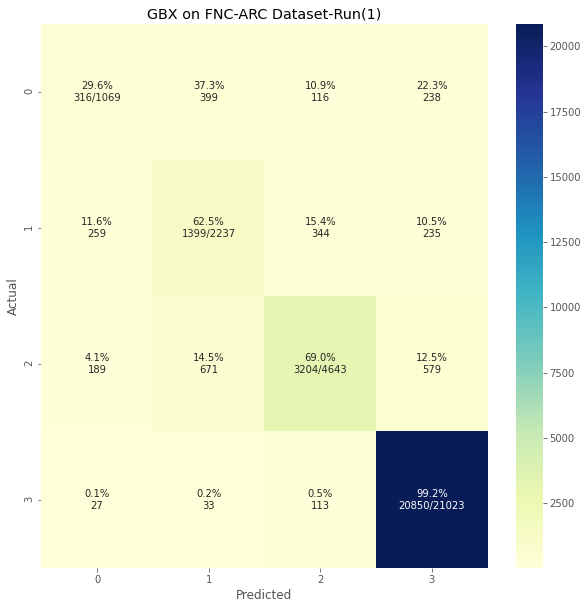

In [ ]:
plot_cm(y_true, y_pred, 'GBX on FNC-ARC Dataset-Run(1)')

In [ ]:
accuracy(y_true,y_pred,'GBX on FNC-ARC Dataset-Run(1)')

The accuracy of the model GBX on FNC-ARC Dataset-Run(1) is Accuracy: 88.944%
              precision    recall  f1-score   support

    disagree       0.40      0.30      0.34      1069
       agree       0.56      0.63      0.59      2237
     discuss       0.85      0.69      0.76      4643
   unrelated       0.95      0.99      0.97     21023

    accuracy                           0.89     28972
   macro avg       0.69      0.65      0.67     28972
weighted avg       0.88      0.89      0.89     28972



In [ ]:
f1_score_m(y_true,y_pred,'GBX on FNC-ARC Dataset-Run(1)')

The F1-M Score of the model GBX on FNC-ARC Dataset-Run(1) is F-1-Score: 66.568%


In [ ]:
report_score(actual=y_true, predicted=y_pred,name='GBX on FNC-ARC Dataset-Run(1)')

For Model GBX on FNC-ARC Dataset-Run(1)
Score: 10626.0 out of 13204.75	(80.47104261724%)


80.47104261724


Following Parameters were used-Run(2)


1.   BATCH_SIZE = 32
2.   EPOCHS=10(With Early Callback)
3.   LEARNING_RATE=3e-5
4.   BETA_1=0.9-BETA_2=0.999
5.   Scheduler=Linear with Intial Learning Rate of 3e-5
6.   Freezing=No Layer was Freezed
7.   MAX_LEN=256
8.   Trained on TPU(Google Colab)

In [ ]:
history = LossHistory()
model.fit(
      train,steps_per_epoch=steps_per_epoch,
      epochs=EPOCHS,callbacks=[history,EARLY_STOP], validation_data=valid,
)
  

Epoch 1/50


   2/1606 [..............................] - ETA: 2:38 - loss: 1.6446 - accuracy: 0.4688  WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0173s vs `on_train_batch_end` time: 0.1776s). Check your callbacks.


1606/1606 [==============================] - ETA: 0s - loss: 0.3051 - accuracy: 0.8947WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0051s vs `on_test_batch_end` time: 0.0493s). Check your callbacks.


1606/1606 [==============================] - 357s 222ms/step - loss: 0.3051 - accuracy: 0.8947 - val_loss: 0.3183 - val_accuracy: 0.8820
Epoch 2/50
1606/1606 [==============================] - 331s 206ms/step - loss: 0.1692 - accuracy: 0.9342 - val_loss: 0.2554 - val_accuracy: 0.9068
Epoch 3/50
1606/1606 [==============================] - 332s 207ms/step - loss: 0.1170 - accuracy: 0.9535 - val_loss: 0.2401 - val_accuracy: 0.9105
Epoch 4/50
1606/1606 [==============================] - 332s 207ms/step - loss: 0.0881 - accuracy: 0.9649 - val_loss: 0.2483 - val_accuracy: 0.9175
Epoch 5/50
1606/1606 [==============================] - 332s 207ms/step - loss: 0.0664 - accuracy: 0.9732 - val_loss: 0.2876 - val_accuracy: 0.9153


In [ ]:
y_pred=model.predict(test,verbose=1)
y_true=np.array(tf.keras.utils.to_categorical(test_df['target'].values))

  2/906 [..............................] - ETA: 1:19:46WARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0047s vs `on_predict_batch_end` time: 0.0454s). Check your callbacks.


906/906 [==============================] - 64s 70ms/step


In [ ]:
saved_history=np.array({'train_loss':history.losses})
np.save('y_pred_gbx_fnc_arc_run(2).npy',y_pred,allow_pickle=True)
np.save('saved_history_gbx_fnc_arc_run(2).npy',saved_history)

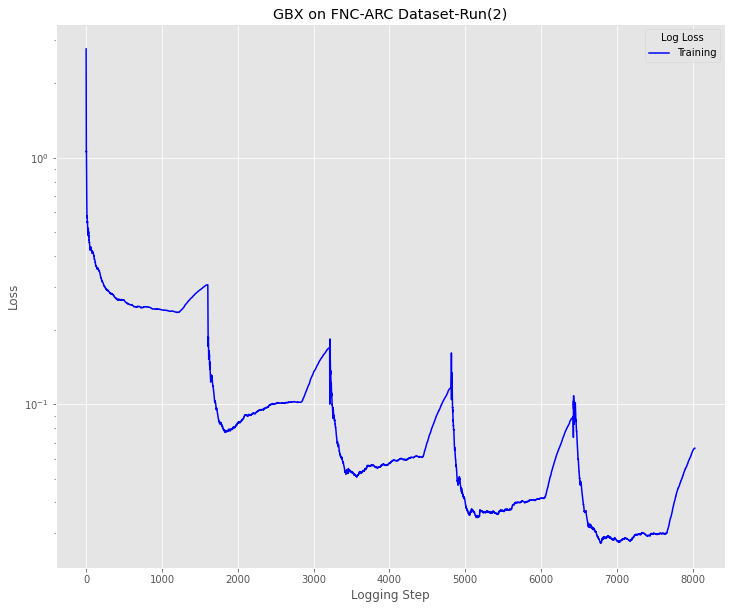

In [ ]:
plot_loss(history,'GBX on FNC-ARC Dataset-Run(2)')

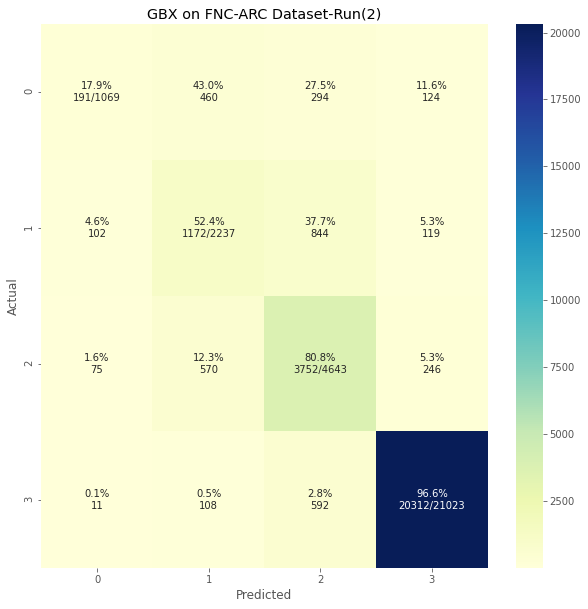

In [ ]:
plot_cm(y_true, y_pred, 'GBX on FNC-ARC Dataset-Run(2)')

In [ ]:
accuracy(y_true,y_pred,'GBX on FNC-ARC Dataset-Run(2)')

The accuracy of the model GBX on FNC-ARC Dataset-Run(2) is Accuracy: 87.764%
              precision    recall  f1-score   support

    disagree       0.50      0.18      0.26      1069
       agree       0.51      0.52      0.52      2237
     discuss       0.68      0.81      0.74      4643
   unrelated       0.98      0.97      0.97     21023

    accuracy                           0.88     28972
   macro avg       0.67      0.62      0.62     28972
weighted avg       0.88      0.88      0.87     28972



In [ ]:
f1_score_m(y_true,y_pred,'GBX on FNC-ARC Dataset-Run(2)')

The F1-M Score of the model GBX on FNC-ARC Dataset-Run(2) is F-1-Score: 62.294%


In [ ]:
report_score(actual=y_true, predicted=y_pred,name='GBX on FNC-ARC Dataset-Run(2)')

For Model GBX on FNC-ARC Dataset-Run(2)
Score: 10779.25 out of 13204.75	(81.63160983736913%)


81.63160983736913

Following Parameters were used-Run(3)


1.   BATCH_SIZE = 32
2.   EPOCHS=30(With Early CallBack)
3.   LEARNING_RATE=1e-5
4.   BETA_1=0.9-BETA_2=0.999
5.   Scheduler=Linear with Intial Learning Rate of 1e-5
6.   Freezing=No Layer was Freezed
7.   MAX_LEN=256
8.   Trained on TPU(Google Colab)
10.  Balanced Wieghts were Used

In [ ]:
history = LossHistory()
y_integers = np.argmax(y_train, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))

model.fit(
      train,steps_per_epoch=steps_per_epoch,
      epochs=EPOCHS,callbacks=[history,EARLY_STOP], validation_data=valid,class_weight=d_class_weights
)
  

Epoch 1/30
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


   2/1606 [..............................] - ETA: 2:39 - loss: 5.7257 - accuracy: 0.0000e+00WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0178s vs `on_train_batch_end` time: 0.1777s). Check your callbacks.


1606/1606 [==============================] - ETA: 0s - loss: 1.5472 - accuracy: 0.5226WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0053s vs `on_test_batch_end` time: 0.0464s). Check your callbacks.


1606/1606 [==============================] - 360s 224ms/step - loss: 1.5472 - accuracy: 0.5226 - val_loss: 0.4034 - val_accuracy: 0.8472
Epoch 2/30
1606/1606 [==============================] - 336s 209ms/step - loss: 0.6043 - accuracy: 0.8744 - val_loss: 0.3476 - val_accuracy: 0.8636
Epoch 3/30
1606/1606 [==============================] - 336s 209ms/step - loss: 0.4237 - accuracy: 0.9158 - val_loss: 0.3281 - val_accuracy: 0.8752
Epoch 4/30
1606/1606 [==============================] - 339s 211ms/step - loss: 0.3012 - accuracy: 0.9391 - val_loss: 0.2590 - val_accuracy: 0.9077
Epoch 5/30
1606/1606 [==============================] - 338s 210ms/step - loss: 0.2055 - accuracy: 0.9555 - val_loss: 0.2756 - val_accuracy: 0.9129
Epoch 6/30
1606/1606 [==============================] - 337s 210ms/step - loss: 0.1291 - accuracy: 0.9695 - val_loss: 0.2923 - val_accuracy: 0.9194
Epoch 7/30
1606/1606 [==============================] - 337s 210ms/step - loss: 0.0971 - accuracy: 0.9765 - val_loss: 0.321

In [ ]:
y_pred=model.predict(test,verbose=1)
y_true=np.array(tf.keras.utils.to_categorical(test_df['target'].values))

  2/906 [..............................] - ETA: 1:17:13WARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0052s vs `on_predict_batch_end` time: 0.0444s). Check your callbacks.


906/906 [==============================] - 61s 68ms/step


In [ ]:
saved_history=np.array({'train_loss':history.losses})
np.save('y_pred_gbx_fnc_arc_run(3).npy',y_pred,allow_pickle=True)
np.save('saved_history_gbx_fnc_arc_run(3).npy',saved_history)

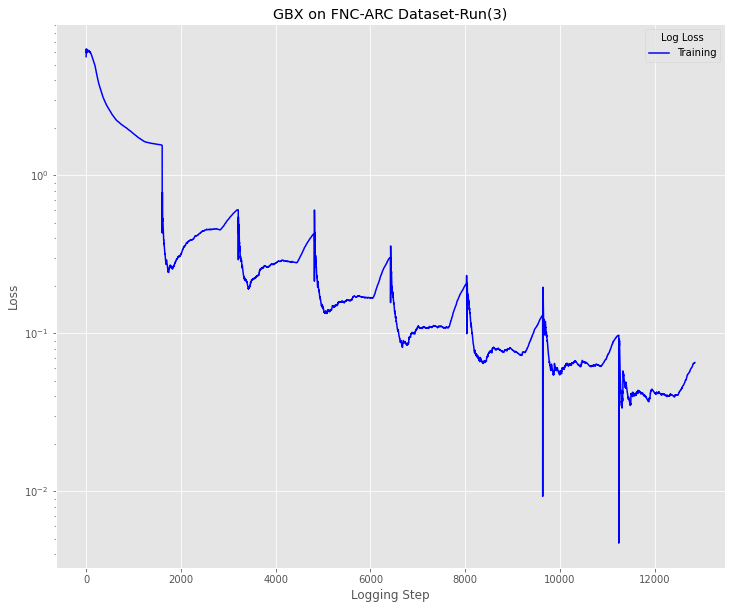

In [ ]:
plot_loss(history,'GBX on FNC-ARC Dataset-Run(3)')

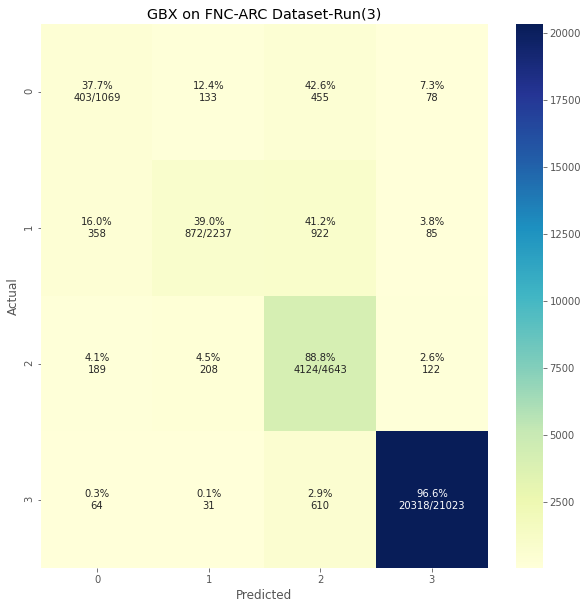

In [ ]:
plot_cm(y_true, y_pred, 'GBX on FNC-ARC Dataset-Run(3)')

In [ ]:
accuracy(y_true,y_pred,'GBX on FNC-ARC Dataset-Run(3)')

The accuracy of the model GBX on FNC-ARC Dataset-Run(3) is Accuracy: 88.765%
              precision    recall  f1-score   support

    disagree       0.40      0.38      0.39      1069
       agree       0.70      0.39      0.50      2237
     discuss       0.67      0.89      0.77      4643
   unrelated       0.99      0.97      0.98     21023

    accuracy                           0.89     28972
   macro avg       0.69      0.66      0.66     28972
weighted avg       0.89      0.89      0.88     28972



In [ ]:
f1_score_m(y_true,y_pred,'GBX on FNC-ARC Dataset-Run(3)')

The F1-M Score of the model GBX on FNC-ARC Dataset-Run(3) is F-1-Score: 65.778%


In [ ]:
report_score(actual=y_true, predicted=y_pred,name='GBX on FNC-ARC Dataset-Run(3)')

For Model GBX on FNC-ARC Dataset-Run(3)
Score: 11044.75 out of 13204.75	(83.6422499479354%)


83.6422499479354

Following Parameters were used-Run(4)


1.   BATCH_SIZE = 32
2.   EPOCHS=30(With Early Stop)
3.   LEARNING_RATE=4e-5
4.   BETA_1=0.9-BETA_2=0.999
5.   Scheduler=Linear with Intial Learning Rate of 4e-5
6.   Freezing=No Layer was Freezed
7.   MAX_LEN=256
8.   Trained on TPU(Google Colab)
10.  Balanced Weights were Used

In [ ]:
history = LossHistory()
y_integers = np.argmax(y_train, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))

model.fit(
      train,steps_per_epoch=steps_per_epoch,
      epochs=EPOCHS,callbacks=[history,EARLY_STOP], validation_data=valid,class_weight=d_class_weights
)

Epoch 1/30


   2/1606 [..............................] - ETA: 2:37 - loss: 5.6423 - accuracy: 0.0312  WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0158s vs `on_train_batch_end` time: 0.1773s). Check your callbacks.


1606/1606 [==============================] - ETA: 0s - loss: 1.1292 - accuracy: 0.7235WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0054s vs `on_test_batch_end` time: 0.0523s). Check your callbacks.


1606/1606 [==============================] - 360s 224ms/step - loss: 1.1292 - accuracy: 0.7235 - val_loss: 0.3769 - val_accuracy: 0.8447
Epoch 2/30
1606/1606 [==============================] - 336s 209ms/step - loss: 0.5706 - accuracy: 0.8878 - val_loss: 0.3198 - val_accuracy: 0.8779
Epoch 3/30
1606/1606 [==============================] - 336s 209ms/step - loss: 0.4278 - accuracy: 0.9149 - val_loss: 0.2499 - val_accuracy: 0.9049
Epoch 4/30
1606/1606 [==============================] - 339s 211ms/step - loss: 0.3009 - accuracy: 0.9384 - val_loss: 0.3403 - val_accuracy: 0.8796
Epoch 5/30
1606/1606 [==============================] - 338s 210ms/step - loss: 0.1892 - accuracy: 0.9572 - val_loss: 0.3221 - val_accuracy: 0.8999
Epoch 6/30
1606/1606 [==============================] - 337s 210ms/step - loss: 0.1303 - accuracy: 0.9692 - val_loss: 0.3783 - val_accuracy: 0.9017
Epoch 7/30
1606/1606 [==============================] - 337s 210ms/step - loss: 0.0905 - accuracy: 0.9757 - val_loss: 0.378

In [ ]:
y_pred=model.predict(test,verbose=1)
y_true=np.array(tf.keras.utils.to_categorical(test_df['target'].values))

  2/906 [..............................] - ETA: 1:19:50WARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0066s vs `on_predict_batch_end` time: 0.0443s). Check your callbacks.


906/906 [==============================] - 63s 69ms/step


In [ ]:
saved_history=np.array({'train_loss':history.losses})
np.save('y_pred_gbx_fnc_arc_run(4).npy',y_pred,allow_pickle=True)
np.save('saved_history_gbx_fnc_arc_run(4).npy',saved_history)

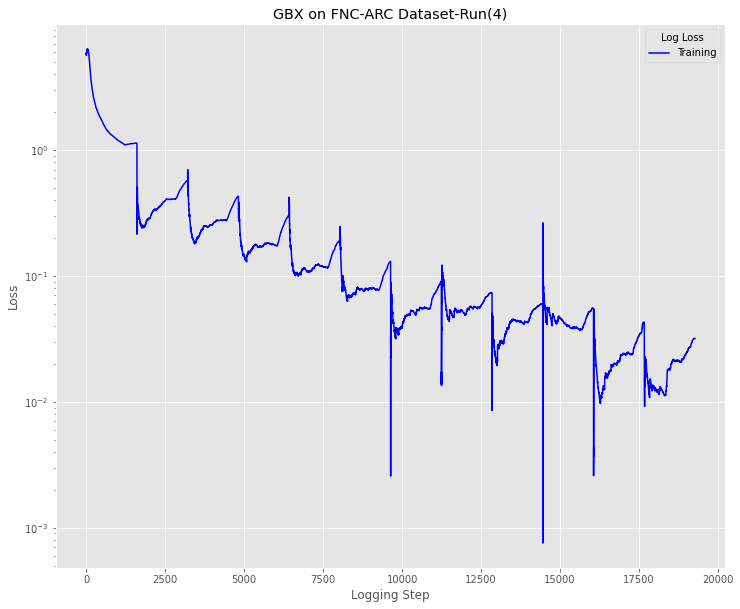

In [ ]:
plot_loss(history,'GBX on FNC-ARC Dataset-Run(4)')

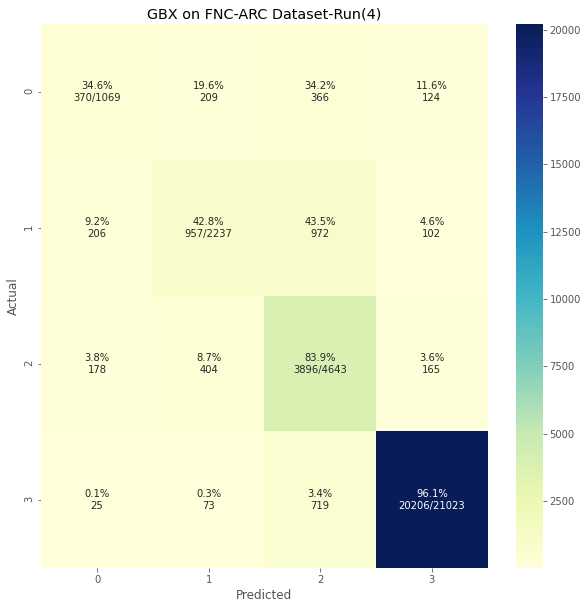

In [ ]:
plot_cm(y_true, y_pred, 'GBX on FNC-ARC Dataset-Run(4)')

In [ ]:
accuracy(y_true,y_pred,'GBX on FNC-ARC Dataset-Run(4)')

The accuracy of the model GBX on FNC-ARC Dataset-Run(4) is Accuracy: 87.771%
              precision    recall  f1-score   support

    disagree       0.47      0.35      0.40      1069
       agree       0.58      0.43      0.49      2237
     discuss       0.65      0.84      0.74      4643
   unrelated       0.98      0.96      0.97     21023

    accuracy                           0.88     28972
   macro avg       0.67      0.64      0.65     28972
weighted avg       0.88      0.88      0.88     28972



In [ ]:
f1_score_m(y_true,y_pred,'GBX on FNC-ARC Dataset-Run(3)')

The F1-M Score of the model GBX on FNC-ARC Dataset-Run(3) is F-1-Score: 65.002%


In [ ]:
report_score(actual=y_true, predicted=y_pred,name='GBX on FNC-ARC Dataset-Run(4)')

For Model GBX on FNC-ARC Dataset-Run(4)
Score: 10858.25 out of 13204.75	(82.22987939945853%)


82.22987939945853